In [ ]:
# Linear Regression
# A regression attempts to fit a function to observed data to make predictions on new data.
# A linear regression fits a straight line to observed data, attempting to demonstrate a linear
# relationship between variables and make predictions on new data yet to be observed.

# Linear regression is a workhorse of data science and statistics and sets up new foundations for
# later topics like neural networks and logistic regression.

# Machine learning practitioners often take a different approach to validation, starting with a
# train-test split of the data. Statisticians are more likely to use metrics like prediction intervals and
# correlation for statistical significance.

# Machine learning has several techniques under its umbrella, but the one with most use cases
# currently is supervised learning, and regressions play a big role here.

# What are the downsides of a linear regression?
# Every outcome may not fall exactly on that line. It may not remotely follow a straight line at all.
# We should not use linear regression to make predictions outside the range of data we have.

# Warning
# It has become fashionable to make data an oracle for truth. However data is simply from a
# population, and we need to practice discernment on how well represented our sample is. Be just
# as interested (if not more) in where the data comes from and not just what the data says.

In [ ]:
# Example
from sklearn import linear_model
reg = linear_model.LinearRegression()

# Multiple linear regression
# Two inputs (x, y) and one output (z)

# Fit a linear model on data
reg.fit([[0, 0], [1, 1], [2, 2]],
        [0, 1, 2])

print("z = {0} + {1}x + {2}y".format(reg.intercept_, reg.coef_[0], reg.coef_[1]))

# Values can be predicted with this linear regression model.

In [ ]:
# Using scikit-learn to do a linear regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns, but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

# m
m = fit.coef_.flatten()
b = fit.intercept_.flatten()

print("m = {0}".format(m))
print("b = {0}".format(b))


# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X + b) # line of best fit
plt.show()

In [ ]:
# Residuals and Squared Errors
# How do statistics tools like scikit-learn come up with a line that fits to these points?
# Questions
# What defines a "best-fit"?
# How do we get to that "best-fit"?

# The residual is the numeric difference between the line and the points. To get the line of best fit is to reduce
# the squares, or more specifically the sum of the squared residuals.
# Another name for residuals are errors, because they reflect how wrong our line is in predicting the data.

In [ ]:
# Calculating the residuals for a given line and data
import pandas as pd
# import points
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",").itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

# Calculate the  residuals
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)


# Why Not Absolute Values?
# Why not just add them up without squaring?
# That will not work because the negatives will cancel out the positives.
# What if we add the absolute values, where we turn all negative values into positive
# values? That sounds promising, but absolute values are mathematically inconvenient.
# More specifically, absolute values do not work well with calculus derivatives that
# are used for gradient descent. 

In [ ]:
# Calculating the sum of squares for a given line and data
import pandas as pd
# import points
points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()

# Test with agiven line
m = 1.93939
b = 4.73333

sum_of_squares = 0.0
# Calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_predict - y_actual)**2
    sum_of_squares += residual_squared

# sum of squares
print("sum of squares = {}".format(sum_of_squares))

#

In [ ]:
# Closed Form Equation
# A closed form equation is an equation for fitting a linear regression by exact equation.
# For a simple linear regression with only one input and one output variable, here at closed form
# that calculate m and b.

# See code below

In [ ]:
import pandas as pd
# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

m = (n*sum(p.x * p.y for p in points) - sum(p.x for p in points)*\
     sum(p.y for p in points)) / (
    n*sum(p.x**2 for p in points) - 
        sum(p.x for p in points)**2)
b = (sum(p.y for p in points)/n) - m*sum(p.x for p in points) / n
print(m, b)

In [ ]:
# Inverse Matrix Techniques
# We can use transposed and inverse matrices to fit a linear regression.
# We calculate a vector of coefficients b given a matrix of input value X and 
# a vector of output values y.

# b = (Xt.X)^(-1).Xt.y
# where Xt is the transpose of X

In [ ]:
# Example
import pandas as pd
from numpy.linalg import inv
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt',
                 delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, -1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Calculate coefficients for slope and intercept
b = inv(X_1.transpose() @ X_1)@(X_1.transpose()@Y)
print(b)


# predict against the y_values
y_predict = X_1.dot(b)
y_predict

In [ ]:
# Matrix decomposition use case in finding a closed form equation for data
# When you have a lot of data with a lot of dimensions, computers can start
# to choke and produce unstable results. This is the use case of matrix decomposition.

import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

# import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

# Extract output column (all rows, last columns)
Y = df.values[:, -1]

# calculate coeeficients for slope and intercept using QR decomposition
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)

print(b)

In [ ]:
# QR DECOMPOSITION is the method used by many scientific libraries for linear
# regression, because it copes with large amounts of data more easily and is
# more stable. Numerical stability is how well an algorithm keeps errors in
# approximations. Computers work only to so many decimal places and have to approximate,
# so it becomes important our algorithms to not deteriot with compounding errors in those
# approximations.

# GRADIENT DESCENT
# Gradient descent is an optimization technique that uses derivatives and iterations to minimize/maximize
# a set of parameters against an objective.
# Learning rate is the size of each step taken to minimze/maximize a parameter.

In [ ]:
# using gradient descent to find the minimum of a parabola
import random
def f(x):
    return (x-3)**2 + 4

def dx_f(x):
    return 2*(x-3)

# learning rate
l = 0.001

# The number of iterations to perform gradient descent
iterations = 100_000

# Start at a random X
x = random.randint(-15, 15)

for i in range(iterations):
    # get slope
    d_x = dx_f(x)

    # update x by subtracting the (learning rate)*(slope)
    x -= l*d_x

print(x, f(x))

In [ ]:
# Gradient Descent and Linear Regression
# When someone says a machine learning algorithm is 'learning', it really is just fitting
# a regression like this.

# performing gradient descent for a linear regression
import pandas as pd

# import points from csv
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

# Build the model
m = 0.0
b = 0.0

# The learning rate 
l = .001
n = float(len(points)) # number of elements in X

# Perform gradient descent
for i in range(iterations):
    # Slope with respect to m
    D_m = sum(2*p.x*((m*p.x+b)-p.y) for p in points)
    # Slope with respect to b
    D_b = sum(2*((m*p.x+b)-p.y) for p in points)

    # update m and b
    m -= l*D_m
    b -= l*D_b

print("y = {0}x + {1}".format(m, b))

In [ ]:
# Gradient Descent for Linear Regression using SymPy
from sympy import *
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i))**2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)

# print
print(d_m)
print(d_b)

In [ ]:
# Executing a linear regression on a dataset
import pandas as pd
from sympy import *

# import points from csv
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)
sum_of_squares = Sum((m*x(i) + b - y(i))**2, (i, 0, n))

d_m = diff(sum_of_squares, m) \
        .subs(n, len(points)-1).doit()\
        .replace(x, lambda i: points[i].x) \
        .replace(y, lambda i: points[i].y) \

d_b = diff(sum_of_squares, b) \
        .subs(n, len(points)-1).doit() \
        .replace(x, lambda i: points[i].x) \
        .replace(y, lambda i: points[i].y)

# Compile using lambdify for faster computation
# lambdify provides convenient functions to transform SymPy expressions to
# lambda functions which can be used to calculate numerical values very fast
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

# Building the model
m = 0.0
b = 0.0

# The learning rate
l = 0.001

# The number of iterations
iterations = 100_000

# Perform gradient descent
for i in range(iterations):
    # update m and b
    m -= d_m(m, b)*l
    b -= d_b(m, b)*l

print("y = {0}x + {1}".format(m, b))

In [ ]:
# plotting the loss function for linear regression
from sympy import *
from sympy.plotting import plot3d
import pandas as pd

points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i))**2, (i, 0, n))\
                    .subs(n, len(points)-1).doit()\
                    .replace(x, lambda i: points[i].x) \
                    .replace(y, lambda i: points[i].y)

plot3d(sum_of_squares)

In [ ]:
# OVERFITTING AND VARIANCE
# The big-picture is not to minimize the sum of squares but to make accurate predictions on new data. This connect-the-dots model
# severely overfit, meaning it shaped the regression to the training data too exactly to the point
# it will predict poorly on new data. It is sensitive to outliers meaning it will have high variance in predictions.

# OVERFITTING IS MEMORIZATION
# When you hear someone say a regression "memorized" the data rather than generalizing it, they
# are talking about overfitting
# The objective is to find effective generalizations in our model rather than memorize data.
# Otherwise, our regression simply turns into a database where we lookup values.
# This is why in machine learning, you will find a bias is added to the model, linear
# regression is considered a highly biased model.

# A biased model leaves some wiggle room hoping to minimize loss on new data for better predictions,
# as opposed to minimizing loss on data it was trained on.

# LASSO AND RIDGE REGRESSION
# Ridge regression adds a further bias to a linear regression in the form of a penalty,
# therefore causing it to fit less to the data. Lasso regression will attempt to marginalize
# noisy variables, making it useful when you want to automatically remove variables that
# might be irrelevant.

# We can not just apply a linear regression to some data, make some predictions with it
# and assume all is OK. A linear regression can overfit even with a bias of a straight line.
# Therefore, we need to check and mitigate both underfitting and overfitting.

# STOCHASTIC GRADIENT DESCENT
# Batch gradient descent: train model on all training data. Stochastic Gradient Descent trains
# on only one sample of the  dataset. In mini-gradient descent, multiple samples of the dataset
# In mini-batch gradient descent, multiple samples of the dataset are used (e.g 10 or 100 data points)
# on each iteration.

# To evaluate our linear regression's reliability, techniques such as train/test split and other
# metrics are used.

In [ ]:
# Performing stochastic gradient descent for a linear regression
import pandas as pd
import numpy as np

# Input data
data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)
X = data.iloc[:, 0].values
Y = data.iloc[:, -1].values

print(data)

print(X, Y)

n = data.shape[0] # rows
print(n)

# Build the model
m = 0.0
b = 0.0

sample_size = 1 #sample size
l = 0.0001 # The learning rate

epochs = 1_000_000 # The number of iterations to perform gradient descent

# Performing stochastic gradient descent
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]

    # The current predicted value of Y
    Y_predict = m*x_sample + b

    # d/db derivative of loss function
    D_m = (-2/sample_size)*sum(x_sample*(y_sample - Y_predict))

    # d/db derivative of loss function
    D_b = (-2/sample_size)*sum(y_sample-Y_predict)

    m -= l*D_m
    b -= l*D_b

    # print progress
    if i%100_000 == 0:
        print(i, m, b)

print("y = {0}x + {1}".format(m, b))

In [ ]:
# PRE-CAUTION
# Put every effort in analysing data and model and be careful to not use seed values and randomness to p-hack a 'good' result.

# WHEN NOT TO USE LINEAR REGRESSION
# Data has high variance. If the data is extremely spread out, it is going to drive up the variance
# to the point predictions become less accurate and useful, resulting in large residuals.

# THE CORRELATION COEFFICIENT
# Correlation numerically measures how "off" our predictions are.

# PEARSON CORRELATION
# Measures the strength of the relationship between two variables as a value between -1 and 1.
# A correlation coefficient closer to 0 indicates there is no correlation. A correlation cofficient closer
# to 1 indicates a strong positive correlation, meaning two values are directly proportional to each other.
# When the correlation cofficient is negative, two values are inversely proportional to each other.
# The correlation coefficient is often denoted as r.

# The correlation coefficient is useful if there is a possible relationship between two varibles. If there is a
# strong positive-negative relationship, it will be useful in our linear regression.
# If there is not a relationship, they may just add noise and hurt the model.

In [ ]:
# Using Pandas to see the correlation coefficient between every point of variables
import pandas as pd

# Read data into Pandas dataframe
df = pd.read_csv('https://bit.ly/2KF29Bd',
                 delimiter=",")

# print correlation between variables
correlations = df.corr(method='pearson')
print(correlations)

# The correlation coefficient 0.957586 between x and y indicates a strong positive correlation between the
# two variables.

In [ ]:
# Calculating correlation coffiecient from scratch in Python
import pandas as pd
from math import sqrt

# Import points from csv
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
n = len(points)

numerator = n*sum(p.x * p.y for p in points) - \
            sum(p.x for p in points) * \
            sum(p.y for p in points)

denominator = sqrt(n*sum(p.x ** 2 for p in points) - sum(p.x for p in points)**2) * \
              sqrt(n* sum(p.y**2 for p in points) - sum(p.y for p in points)**2)

corr = numerator / denominator
print(corr)

In [ ]:
# STATISTICAL SIGNIFICANCE
# This provides a numerical value that informs if the correlation coefficient is not coincidential.
# N.B statsmodel is a noteworthy library if you want to do statistical analysis. Scikit-learn and other
# machine learning libraries do not provide tools for statistical and confidence intervals.

# We need to not just express the correlation coefficient but also quantify how confident we are that
# the correlation coefficient did not occur by chance.

# Population correlation coefficient is denoted by Greek symbol (rho) while the sample correlation
# coeficient is dentoted by r.

# Our null hypothesis is that there is no relationship between two variables, or more technically the
# correlation coefficient is 0.

# The alternative hypothesis is there is a relationship, and it can be a positive or negative correlation.
# We use a T-distribution rather than a normal distribution to do hypothesis testing with linear regression.

# A T-distribution with 9 degrees of freedom, as there are 10 records and we subtract one. A degree of freedom
# is the number of values in the final calculation of a statistic that are free to vary.

# A statistical critical value is a cut-off point that determines whether to reject or accept a null hypothesis
# in a statistical test.

In [ ]:
# Calculating the critical value from a T-distribution
from scipy.stats import t
n = 10

# Lower critical value
lower_cv = t(n-1).ppf(.025)

# Upper critical value
upper_cv = t(n-1).ppf(.975)

print(lower_cv, upper_cv)

In [ ]:
# Testing significance for a linear-looking data
from scipy.stats import t
from math import sqrt

# Sample size
n = 10

lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

# correlation coefficient
# derived from data at https://bit.ly/2KF29Bd
r = 0.957586

# Perform the test
test_value = r / sqrt((1-r**2)/(n-2))

print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("CORRELATION PROVEN, REJECT H0")
else:
    print("CORRELATION NOT PROVEN, FAILED TO REJECT H0")

# Calculate p-value
if test_value > 0:
    p_value = 1.0 - t(n-1).cdf(test_value)
else:
    p_value = t(n-1).cdf(test_value)

# Two-tailed, so multiply by 2
p_value = p_value*2
print("P-VALUE: {}".format(p_value))

In [ ]:
# The test value here is approximately 9.39956, which is definitely
# outside the range of (-2.262, 2.262) so we can reject the null hypothesis
# and say our correlation is real. That is because the p-value is remarkably
# significant: 0.0000059738. It is highly unlikely these points randomly
# arranged themselves near a line this closely by chance.

# When you have a p-value this low, you can bet you are measuring an engineered
# and tightly controlled process, not something sociological or natural.

# The rule is this; the more data you have that consistently resembles a line; the more
# significant the p-value for your correlation will be. The more scattered or sparse
# the data, the more the p-value will increase and thus indicate your correlation occurred
# random chance.

In [ ]:
# COEFFICIENT OF DETERMINATION
# The coefficient of determination, r squared, measures how much variation in one variable
# is explained by the variation of the other variable. It is also the square of the
# correlation coefficient, r.

In [ ]:
# Creating a correlation matrix in Pandas
import pandas as pd
# Read data into Pandas dataframe
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

# print correlations between variables
coeff_determination = df.corr(method='pearson')**2
print(coeff_determination)

In [ ]:
# STANDARD ERROR OF THE ESTIMATE
# One way to measure the overall error of a linear regression is the SSE, Sum of Squared Error.
# Check out for formulas pf SSE and standard Error of the Estimate
# The standard error of estimates looks closely to the standard deviation.It is the standard deviation of the
# linear regrression.

In [ ]:
# Calculating the standard error of the estimate
# Here is how we calculate it in Python:
import pandas as pd
from math import sqrt

# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=',').itertuples())

n = len(points)

# Regression line
m = 1.939
b = 4.733

# Calculate standard error of estimate
S_e = sqrt((sum((p.y - (m*p.x + b))**2 for p in points)) / (n-2))

print(S_e)

In [ ]:
# PREDICTION INTERVALS
# This is a confidence interval around each y prediction. It is an estimate of an interval in which a future 
# observation will fall, with a certain probability given what has already been observed.

In [ ]:
# Calculating a prediction interval of vet visits for a dog that's 8.5 years old
import pandas as pd
from scipy.stats import t
from math import sqrt

# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd',
                          delimiter=",").itertuples())
n = len(points)

# Linear Regression Line
m = 1.939
b = 4.733

# Calculate prediction interval for x=8.5
x_0 = 8.5
x_mean = sum(p.x for p in points) / len(points)
t_value = t(n-2).ppf(.975)

standard_error = sqrt(sum((p.y - (m*p.x + b))**2 for p in points) / (n-2))

margin_of_error = t_value * standard_error * \
                sqrt(1+ (1/n) + \
                     (n * (x_0 - x_mean)**2) / (n*sum(p.x**2 for p in points) - sum(p.x for p in points)**2))

predicted_y = m*x_0 + b

# Calculate prediction interval
print(predicted_y - margin_of_error, predicted_y + margin_of_error)

In [ ]:
# We not only create a prediction based on a linear regression (e.g a dog that is 8.5 years old will have
# 21.2145 vet visits), but we also are actually able to say something much less absolute: there's a 95%
# probability an 8.5 year old dog will visit the vet between 16.46 and 25.96 times.
# And it's a safer claim because it captures a range rather than a single value, and thus accounts for uncertainty.

In [ ]:
# CONFIDENCE INTERVAL FOR PARAMETERS
# Parameters like m and b have their own distributions, and we can model confidence intervals
# around m and b individually to reflect the population's slope and y-intercept.

# Train/Test Split
# Scikit-learn does not support confidence intervals and p-values, as these two techniques are open
# problems for higher-dimensional data.

# Train/Test split is a basic technique machine learning practitioners use to mitigate overfitting,
# where typically 1/3 of the data is set aside for testing and the other 2/3 is used for training.

# The training dataset is used to fit the linear regression, while the testing dataset is used
# to measure the linear regression's performance on data it has not seen before. This technique
# is generally used for all supervised machine learning, including logistic regression and neural networks.

# N.B Training is fitting a regression

In [ ]:
# Train/Test split on a linear regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load the data
df = pd.read_csv("https://bit.ly/3cIH97A",
                 delimiter=",")
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data
# This leaves a third of the data out for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("r^2: %.3f", result)

In [ ]:
# CROSS-VALIDATION
# Cross-validation is considered the gold standard of validation techniques.
# It is a technique used to evaluate the performance of a model by repeatedly 
# splitting the dataset into different training and testing sets, allowing for a
# more robust assessment of how well the model generalizes to unseen data, rather
# than just relying on a single train-test split. It helps to identify potential overfitting
# issues and provides a more reliable estimate of the model's accuracy across different
# subsets.

In [ ]:
# Using cross-validation for a linear regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3cIH97A',
             delimiter=',')
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Perform a simple linear regression.
kfold = KFold(n_splits=3,
              random_state=7,
              shuffle=True)

model = LinearRegression()
result = cross_val_score(model, X, Y, cv=kfold)
print(result)
# MSE: Mean Sum of Error
print("MSE: mean=%.3f (stdev-%.3f)"%(result.mean(), result.std()))

In [ ]:
# We do not have to fold our data by thirds. You can use k-fold validation to split on any proportion.
# Typically, 1/3, 1/5 or 1/10 is used for the preparation of testing,
# but 1/3 is the most common.

# Generally, the k you choose has a result in a test dataset that has a large enough sample for the problem.

In [ ]:
# When you get concerned about variance in your model, one thing you can do, rather than a simple train/test split
# or cross-validation, is use random-fold validation to repeatedly shuffle and train/test split
# your data an unlimited number of times and aggregate the testing results.

# Cross-validation
# This is a technique used in machine learning to evaluate the performance of a model on unseen data. Cross-validation
# or rotation estimation or out-of-sample testing, is any of various similar model validation techinques 
# for assessing how the results of a statistical analysis will generalize to an independent dataset.

In [ ]:
# Using a random-fold validation for a linear regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

df = pd.read_csv("https://bit.ly/38XwbeB",
                 delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output columns (all rows, all columns)
Y = df.values[:,-1]

# Perform a simple linear regression
kfold = ShuffleSplit(n_splits=10, test_size=.33, random_state=7)

model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

# results
print(results)
print("mean=%.3f (stdev-%.3f)"%(results.mean(), results.std()))

In [ ]:
# MULTIPLE LINEAR REGRESSION
# A linear regression with two input variables
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv("https://bit.ly/2X1HWH7",
                 delimiter=",")

# Extract input variables (all rows, all columns, but last column)
X = df.values[:, :-1]

# Extract output column(all rows, last column)
Y = df.values[:, -1]

# Training
fit = LinearRegression().fit(X, Y)

# Print coefficients
print("Coefficients = {0}".format(fit.coef_))
print("Intercept = {0}".format(fit.intercept_))
print("z = {0} + {1}x + {2}y".format(fit.intercept_, fit.coef_[0], fit.coef_[1]))

<h3>Sales Prediction with linear Regression</h3>

In [1]:
# CHALLENGES
# SALES PREDICTION WITH LINEAR REGRESSION
# Build a prediction model which predicts sales based on the money spent on different
# platforms for marketing

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

dfAdvert = pd.read_csv('../Data/Advertising.csv',
                       # index_col=0
                      )
dfAdvert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
# Inspect data
dfAdvert.shape

(200, 4)

In [3]:
dfAdvert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
dfAdvert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# check for null values
dfAdvert.isnull().sum()
# There are no null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

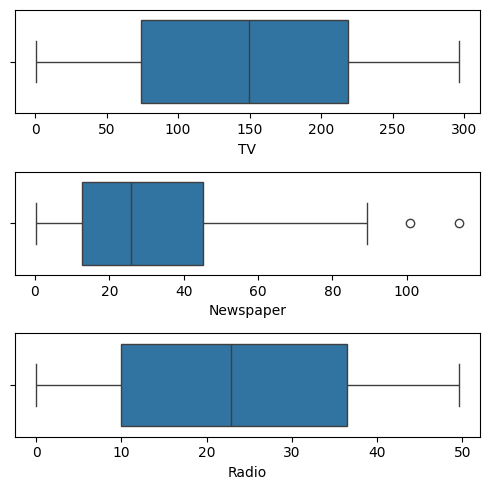

In [6]:
# Outlier analysis
fig, axs = plt.subplots(3, figsize=(5,5))
plt1 = sns.boxplot(x=dfAdvert['TV'], ax=axs[0])
plt2 = sns.boxplot(x=dfAdvert['Newspaper'], ax=axs[1])
plt3 = sns.boxplot(x=dfAdvert['Radio'], ax=axs[2])
plt.tight_layout()
# plt.show()

In [ ]:
# There are no considerable outliers
# Newspaper has some outliers
# There are no outliers in Radio and TV

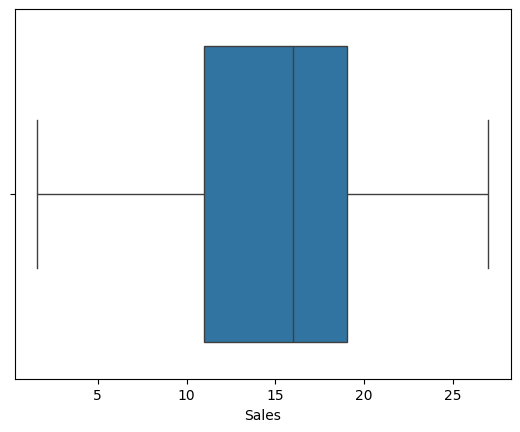

In [7]:
# Exploratory Data Analysis
# Univariate Analysis
sns.boxplot(x=dfAdvert['Sales'])
plt.show()

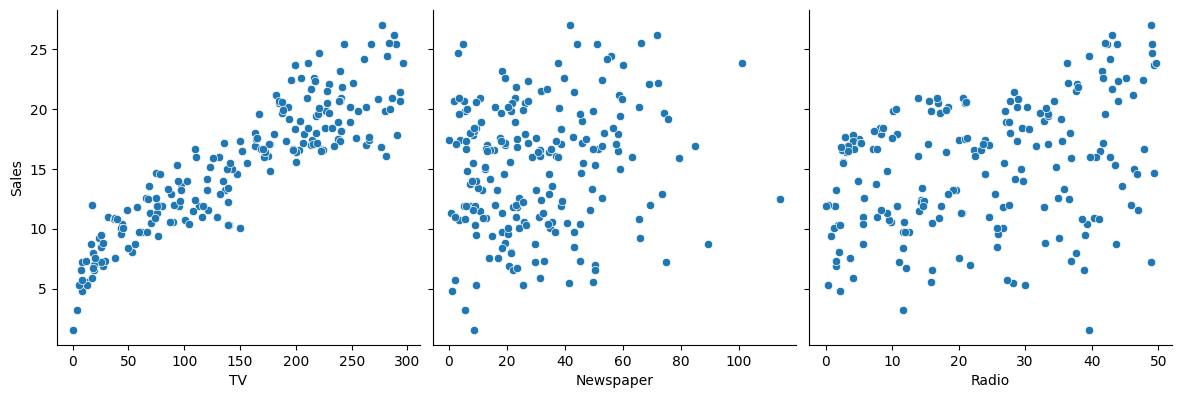

In [8]:
# Variation of sales with other variables using a scatter plot
sns.pairplot(dfAdvert, x_vars=['TV', 'Newspaper', 'Radio'],
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

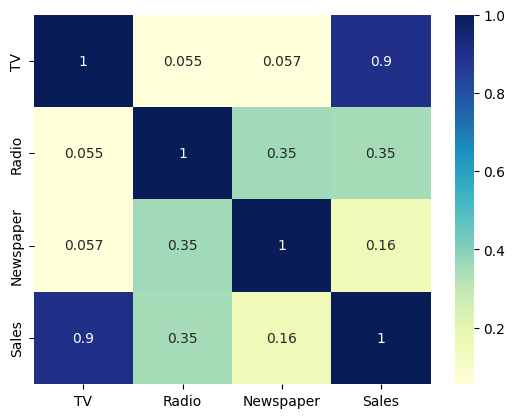

In [9]:
# Correlation between different variables
sns.heatmap(dfAdvert.corr(),
            cmap="YlGnBu",
            annot=True
           )
plt.show()

# As seen in the heatmap, TV correlates more with Sales than anyother variable.

In [10]:
# Building a linear model
X = dfAdvert['TV']
y = dfAdvert['Sales']

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    # train_size=0.7,
                                                    test_size=.3,
                                                    random_state=100
                                                   )

# Let's take a look at the train dataset

In [11]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [12]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [13]:
# Building a linear model
import statsmodels.api as sm

# By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order
# to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added
# the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares)
# attribute of statsmodels as shown below

In [14]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using OLS
lr = sm.OLS(y_train, X_train_sm).fit()

In [15]:
# Print the parameters, i.e the intercept and the scope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [16]:
# Performing a summary operation list outputs all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.52e-52
Time:                        16:34:12   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [ ]:
# Looking at some key statistics from summary
# The values we are concerned with are;
# 1. The coefficients and significance (p-values)
# 2. R-squared
# 3. F Statistics and its significance
# 4. The coefficient for TV is 0.054, with a very low p-value
# The coefficient is statistically significant, so the association is not purely by chance.

# R-squared is 0.816,
# meaning that 81.6 percent of the variance in sales is explained by Tv
# This is a descent R-squared value

# F-statistic has a very low value (practically low)
# meaning that the model fit is statistically significant, and explained variance isn't purely by chance.
# The fit is significant.

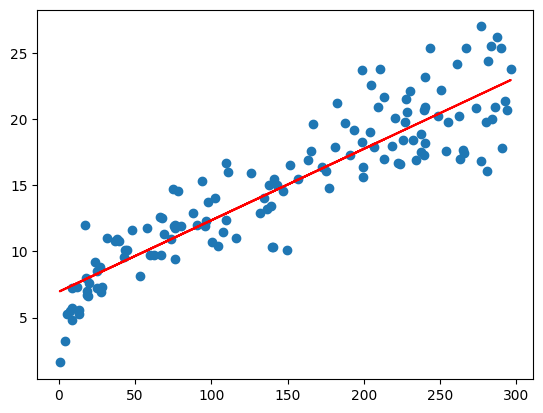

In [17]:
# Visualizing how well the model fit the data
# Scatter plot
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')

In [19]:
# Residual analysis
# To validate assumptions of the model, and hence the reliability for inference.

# Distribution of the error terms
# We need to check if the error terms are normally distributed (which is infact, one of the major assumptions of 
# linear regressions). 
# plotting a histogram of error terms and see what it looks like.

y_train_pred = lr.predict(X_train_sm)
res = (y_train-y_train_pred)

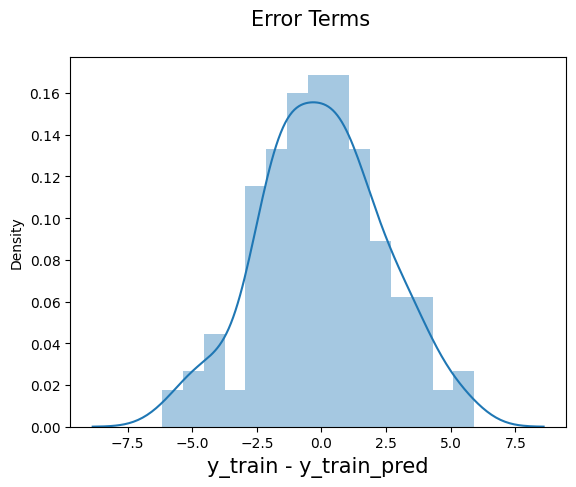

In [20]:
# plot
fig = plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

In [ ]:
# The residuals follow a normal distribution with a mean of 0.0. This is all good news!

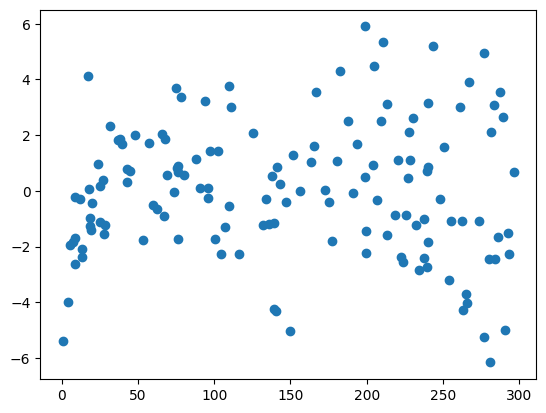

In [21]:
# Looking for patterns in the residuals
plt.scatter(X_train, res)
plt.show()

In [22]:
# Predictions on the test set
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(2.019296008966232)

In [24]:
# Checking the r-squared on the test
# r2_score is between -1 and 1. The more r2 tends to 1, the more significant is the correlation.
# Thus the correlation is statistically significant.
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

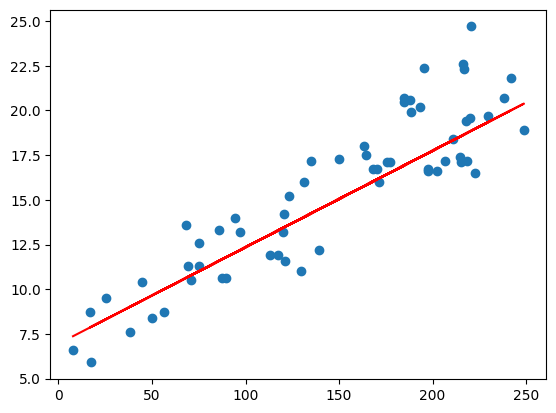

In [25]:
# Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054*X_test, 'r')
plt.show()

In [26]:
# Linear Regression using linear_model in sklearn
# When there is only a single feature, we need to add an additional column in order for a linear regression fit
# to be performed successfully

from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size=0.7, test_size=.3, random_state=100)
X_train_lm.shape

(140,)

In [27]:
# Reshape X_train_lm
X_train_lm = X_train_lm.values.reshape(-1, 1)
X_test_lm = X_test_lm.values.reshape(-1, 1)

In [28]:
print(X_train_lm.shape)
print(X_test_lm.shape)
print(y_train_lm.shape)
print(y_test_lm.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [29]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fit the model using fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [30]:
# intercept
# y = m*x + c
print(lm.intercept_)

# Coefficient
print(lm.coef_)

6.948683200001357
[0.05454575]


In [ ]:
# The model is the same as before

<h3>Boston Housing Data</h3>

In [ ]:
# CHALLENGE TWO
# Boston Housing Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# from sklearn.datasets import load_boston

In [ ]:
df = pd.read_csv(filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
                delim_whitespace=True,
                skiprows=21,
                header=None)

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

In [ ]:
# Flatten all the values into a single long list and remove the nulls
values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

# Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data=all_values.reshape(-1, len(columns)),
    columns=columns)

In [ ]:
df

In [ ]:
# Quick Analysis
print("Shape: ", df.shape)
print("Columns: ", df.columns.to_list())

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# Data Wrangling
df.isnull().sum()

# No null values

In [ ]:
# Visualisation of distribution
df.hist(bins=30, 
        figsize=(18,18));

In [ ]:
# Visualising variation between the independent variable and the dependent variable
plt.figure(figsize=(25, 25))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.regplot(x=col, y='MEDV', data=df)
    plt.title("%s vs MEDV"%(col))

In [ ]:
# Observations so far
# Variable 'RM' seems to have positive linear relationship with target variable 'MEDV'
# Variable 'LSTAT' seems to have negative linear relationship with target variable 'MEDV'
# Using pearson correlation to analysis correlation between variables

In [ ]:
# Visualize pearson corr
sns.set(rc={'figure.figsize': (8, 8)})
sns.heatmap(df.corr(method='pearson').round(2),
            square=True,
            cmap='RdYlGn',
            annot=True
           );

In [ ]:
# P_value
pearson_coef1, p_value1 = stats.pearsonr(df['RM'], df['MEDV'])
print("The pearson correlation coefficient for RM is", pearson_coef1, "with a p_value of P = ", p_value1)

# LSTAT
pearson_coef2, p_value2 = stats.pearsonr(df['LSTAT'], df['MEDV'])
print("The pearson correlation coefficient for LSTAT is", pearson_coef2, "with a p_value of P = ", p_value2)
print("Is there strong evidence if correlation is significant for RM", p_value1 <0.001)
print("Is there strong evidence if correlation is significant for LSTAT", p_value2 <0.001)

In [ ]:
# Correlation is significant for both RM and LSTAT

In [ ]:
# Linear model
lm1 = LinearRegression()
X1 = df[['RM']]
y1 = df[['MEDV']]

# Fit (Train) the model
lm1.fit(X1, y1)

print("Intercept for the model is", lm1.intercept_[0], "and the scope is ", lm1.coef_[0])

# Prediction
y_out1 = lm1.predict(X1)

# Actual and predicted values
print("Predicted values: ", y_out1[:5])

print("Actual values: ", y1.values[:5])

In [ ]:
# Multiple linear regression
lm2 = LinearRegression()
X2 = df[['RM', 'LSTAT']]
y2 = df[['MEDV']]

# Fit the model
lm2.fit(X2, y2)

print("Intercept for the model is", lm2.intercept_, "and the scope is ", lm2.coef_)

# predict
y_out2 = lm2.predict(X2)

# Actual and predicted values (first five)
print("Predicted values: ", y_out2[:5])
print("Actual values: ", y2.values[:5])

In [ ]:
# Model Visualization
# For simple linear regression, we can use regression plot or residual plot.
# A residual plot is the difference between the observed value (y) and the predicted value (y_out)

# If the points in a resisual plot are randomly spreadout around the x-axis, then the linear model is apropriate for the data.
# Randomly spreadout residuals means the variance is constant, and thus the linear model is a good fit for this data.

plt.figure(figsize=(6,6))
sns.residplot(x=df['RM'], y=df['MEDV'])
plt.show()

In [ ]:
# Visualizing a multiple linear regression
# For a multiple linear regression, we can't use a regression or residual plot because of multiple independent
# variables, so we will use a distribution plot
plt.figure(figsize=(6,6))
ax1 = sns.distplot(df['MEDV'],
                   hist=False,
                   color='r',
                   label='Actual',
                  );
sns.distplot(y_out2,
             hist=False,
             color='b',
             label='Fitted',
             ax=ax1);

In [ ]:
# MODEL ACCURACY
from sklearn.metrics import mean_squared_error
# simple Linear Regression
mse1 = mean_squared_error(y1, y_out1)

print("Mean Squared Error for simple linear regression is ", mse1)
print("R-squared value for simple linear regression is ", lm1.score(X1, y1))

In [ ]:
# Multiple linear Regression
mse2 = mean_squared_error(y2, y_out2)
print("Mean Square Error for multiple linear regression is ", mse2)
print("R-Square value for multiple linear regression is ", lm2.score(X2, y2))

In [ ]:
# The best model is one with less MSE and higher R-squared
# Thus the second model is the better one.

In [ ]:
# MODEL EVALUATION
mse2 = mean_squared_error(y2, y_out2)
y_data = df['MEDV']
X_data = df.drop('MEDV', axis=1)
from sklearn.model_selection import train_test_split

#Split the data into test and training (15% as test data)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.15, random_state=10)
print("Number of test samples: ", X_test.shape[0])
print("Number of training samples: ", X_train.shape[0])

lm = LinearRegression()

# Fit (train) the model using the training data
lm.fit(X_train[['RM', 'LSTAT']], y_train)

# Prediction using Training Data
y_out_train = lm.predict(X_train[['RM', 'LSTAT']])
print(y_out_train[0:5])

# Prediction using Test Data
y_out_test = lm.predict(X_test[['RM', 'LSTAT']])
print(y_out_test[:5])

# Model Accuracy using test data
mse_test = mean_squared_error(y_test, y_out_test)
print("Mean Square Error is ", mse_test)
print("R-Square value using test data is", lm.score(X_test[['RM', 'LSTAT']], y_test))

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score, KFold
rcross = cross_val_score(lm, X_data, y_data, cv=KFold(n_splits=5, shuffle=True))
print(rcross)
print("The mean of the folds are", rcross.mean())

<h3>Sweden Insurance</h3>
<p>The Auto Insurance in Sweden dataset involves predicting the total payment for all the claims
in thousands of Swedish Kronor, y given the total number of claims, x.</p>

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import math
import matplotlib as plt
import plotly.express as px

In [ ]:
# Read Data
data = pd.read_csv("../Data/swedish_insurance.csv")
data.info()

In [ ]:
# columns
print(data.columns)

In [ ]:
data.head(5)

In [ ]:
# Visualization
fig = px.box(data['X'], points="all", width=500, height=500)
fig.update_layout(title=f'Distribution of X',
                  title_x=0.5,
                  yaxis_title="Number of Insurance Claims")
fig.show()

# y variable
fig = px.box(data['Y'], points='all',
            width=500,
            height=500)
fig.update_layout(title=f'Distribution of Y',
                  title_x=.5,
                  yaxis_title="Amount of Insurance Paid")

In [ ]:
# Scatter Plot
fig = px.scatter(x=data['X'], y=data['Y'])
fig.update_layout(title='Swedish Automobiles Data',
                  title_x=.5,
                  xaxis_title="Number of claims",
                  yaxis_title='Payment in Claims', 
                  height=500,
                  width=600)
fig.update_xaxes(showline=True,
                 linewidth=2,
                 linecolor="black",
                 mirror=True)
fig.update_yaxes(
    showline=True,
                 linewidth=2,
                 linecolor='black',
                 mirror=True)
fig.show()

In [ ]:
# Mean and variance
mean_x = np.mean(data['X'])
mean_y = np.mean(data['Y'])

var_x = np.var(data['X'])
var_y = np.var(data['Y'])

print('xstats: mean=%.3f variance=%.3f'%(mean_x, var_x))
print('ystats: mean=%.3f variance=%.3f'%(mean_y, var_x))

In [ ]:
# Covariance
# The covariance of two variables describes how those numbers vary together. Covariance is the generalization of correlation.
# Correlation describes the relationships between two variables, while as covariance describes the relationship between two or more groups
# of numbers.

In [ ]:
# calculate the covariance between x and y
def covariance(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i]-mean_x)*(y[i]-mean_y)
    return covar / len(x)

covar_xy = covariance(data['X'], data['Y'])
print(f'Cov(X, Y): {covar_xy}')

In [ ]:
# Estimate coefficients
b1 = covar_xy / var_x
b0 = mean_y - b1*mean_x
print(f'Coefficients: \nb0: {b0} b1: {b1}')

In [ ]:
# Make Predictions
x = data['X'].values.copy()

# Predicting the new data based on calculated coefficients
y_predict = b0 + b1*x
print(f'\n\ny_predict: {y_predict}')
y = data['Y'].values[:5]
print(f'\n\ny: {y}')

In [ ]:
# Visual Comparisons of Correctness
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['X'],
                         y=data['Y'],
                         name='train',
                         mode='markers',
                         marker_color='rgba(152, 0, 0, .8)'))
fig.add_trace(go.Scatter(x=data['X'],
                                     y=y_predict,
                                     name='prediction',
                                     mode='lines+markers',
                                     marker_color='rgba(0, 152, 0, 0.8)'))
fig.update_layout(title=f'Swedish Automobiles Data\n(Visual Comparison for Correctness)',
                title_x=0.5,
                xaxis_title='Number of Claims',
                yaxis_title='Payment in Claims',
                height=500,
                width=600)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black',
                 mirror=True)
fig.update_yaxes(showline=True,
                 linewidth=2,
                 linecolor='black',
                 mirror=True)
fig.show()

In [ ]:
# Exercise
# 1. Find the mean square error, MSE of the predictions.
# 2. Extend the problem for multiple input features

<h3>Student Performance Predictions</h3>
<p>
    The Student Performance dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about the
    various predictors and a performance index.
</p>

<h4>
    Variables:
</h4>

<p>
    Hours Studied: The Total number of hours spent studying by each student.
</p>

<p>
    Previous Scores: The scores obtained by the student in the previous test
</p>

<p>
    Extra curricular activities: Whether the student participates in extra-curricular activities (Yes/No).
</p>

<p>
    Sleep Hours: The avarage number of sleep the student had per day.
</p>

<p>
    Sample Question papers Practised: The number of Sample question papers the student practised.
</p>

<h5>Target Variable</h5>
<p>
    Performance Index: A measure of the overall performance of each student. The performance index represents
    the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with the highest values indicating better performance.
</p>

<p>
    N.B: The dataset is synthetic and created for illustrative purposes. The relationships between the variables and the performance index may not reflect real-world scenarios.
</p>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [3]:
# Read dataset
data = pd.read_csv("../Data/studentPerformance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
# See percentage of missing values in each column
data.isna().sum() / data.shape[0]

# No null values

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

In [6]:
# See dimensions
data.shape

(10000, 6)

In [7]:
# Check if duplicates in data
data.duplicated().any()

# At first glance, they may look to be duplicate values, but they are not. Remember this is synthetic data

np.True_

In [8]:
# Statistics
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
# see quick info of category values
data.describe(include=object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


In [10]:
# Univariate Analysis and Visualization

In [11]:
# Create a function to visualize categorical columns using count plot
def count_plot(column_name,
               hue=None,
               rotation=0):
    graph = sns.countplot(x=column_name,
                          data=data,
                          hue=hue,
                          order=data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
    plt.xticks(rotation=rotation);
    plt.figure(figsize=(8,5));
    plt.show();

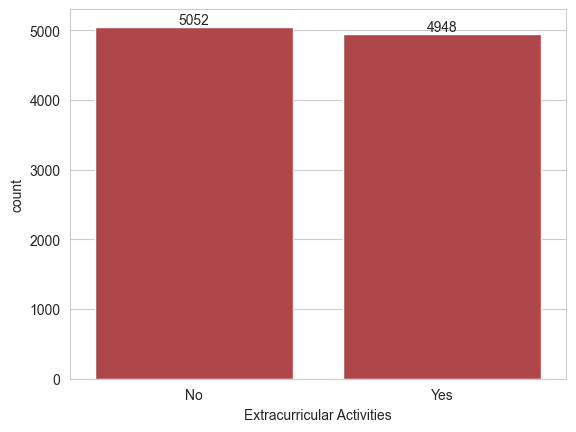

<Figure size 800x500 with 0 Axes>

In [12]:
count_plot('Extracurricular Activities');

In [13]:
# Function to visualize numeric columns using boxplots
def box_plot(x_axis=None, y_axis=None, hue=None, col=None):
    sns.catplot(x=x_axis,
                y=y_axis,
                data=data,
                kind="box",
                col=col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

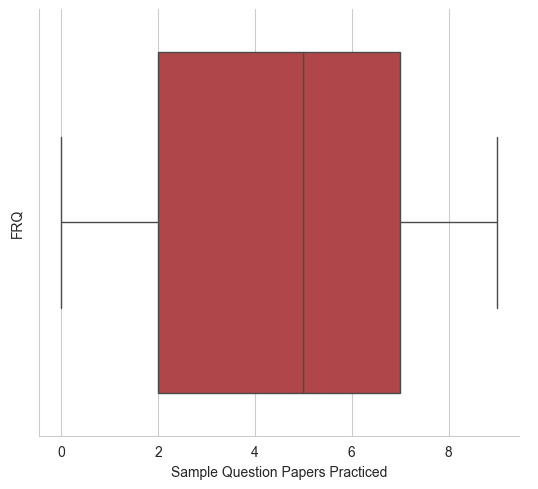

In [14]:
box_plot('Sample Question Papers Practiced')

In [15]:
# Analysing hours studied
data['Hours Studied'].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

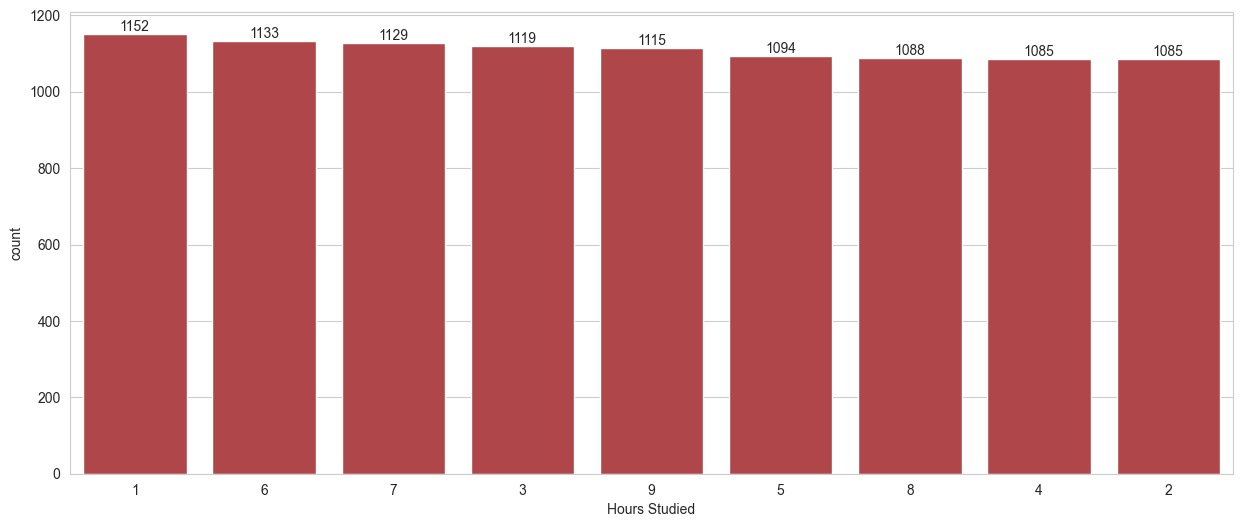

<Figure size 800x500 with 0 Axes>

In [16]:
# Count frequencies
plt.figure(figsize=(15,6))
count_plot(column_name='Hours Studied')

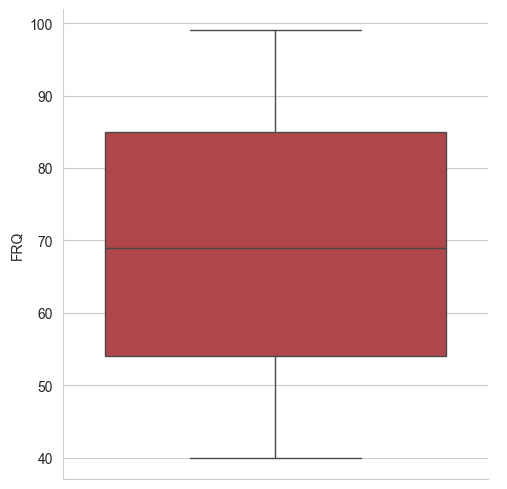

In [17]:
# Analysing previous scores
box_plot(y_axis="Previous Scores")
# 50% of the students scored above 65.
# No student scored 100.

In [18]:
# Analysing extracurricular activities
data['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

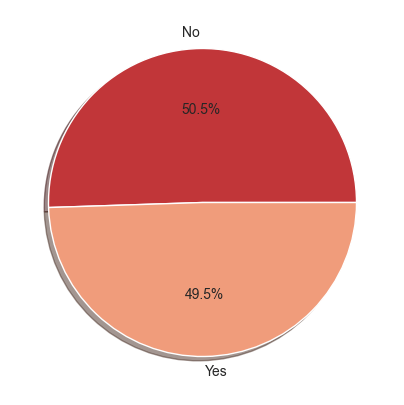

In [19]:
# Output number of value_counts
plt.figure(figsize=(5,5));
plt.pie(data['Extracurricular Activities'].value_counts(),
        labels=data["Extracurricular Activities"].value_counts().index,
        shadow=True,
        autopct="%1.1f%%");

# Slightly more students don't participate in extracurricular activities

In [20]:
# Analysing sleep hours
data['Sleep Hours'].unique()

array([9, 4, 7, 5, 8, 6])

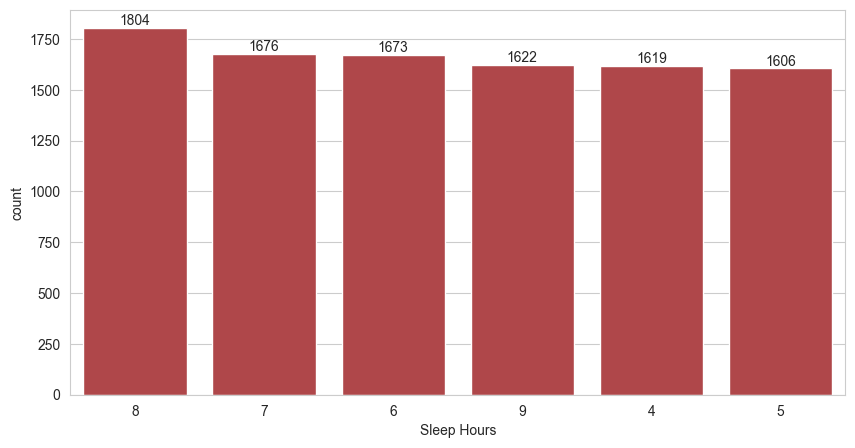

<Figure size 800x500 with 0 Axes>

In [21]:
# Using a count_plot
plt.figure(figsize=(10, 5))
count_plot(column_name='Sleep Hours');

# The largest number of students study for one hour

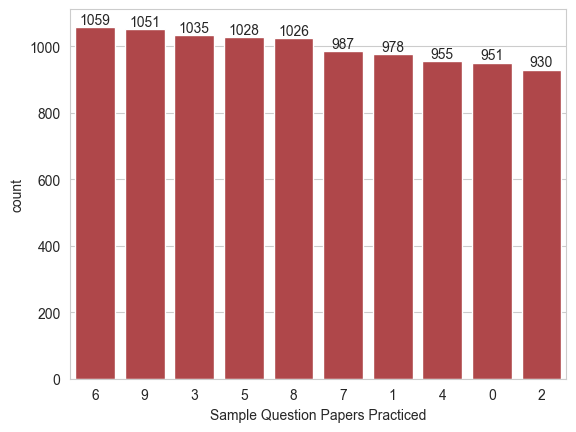

<Figure size 800x500 with 0 Axes>

In [23]:
# Sample Questions Practiced
count_plot(column_name='Sample Question Papers Practiced')

In [24]:
# A number of students have similar number of sample questions practised
# A number of students didn't practise sample questions

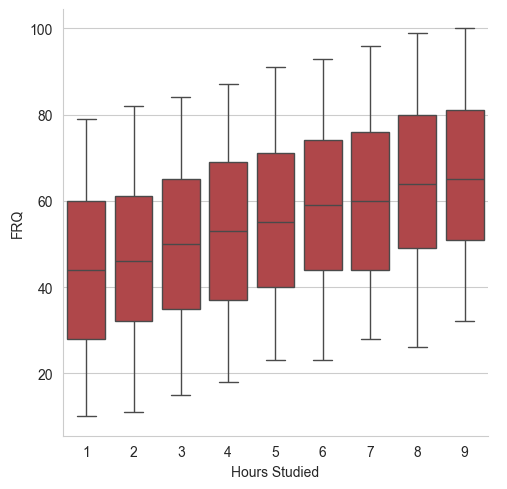

In [25]:
# Bivariate and Visualization
# Hours studied and Performance Index
box_plot(x_axis='Hours Studied',
         y_axis='Performance Index')

In [26]:
# From the data, the more hours studied the greater the performance index.

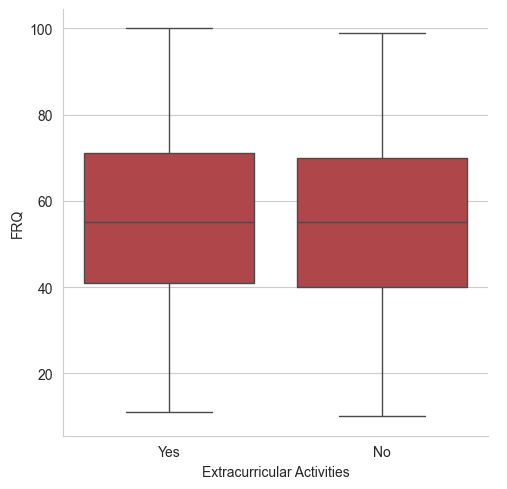

In [27]:
# Extra Curricular Activities and Performance Index
box_plot(x_axis='Extracurricular Activities',
         y_axis='Performance Index');

In [28]:
# Participation in extracurricular activities helps to a very small extent in obtaining high grades

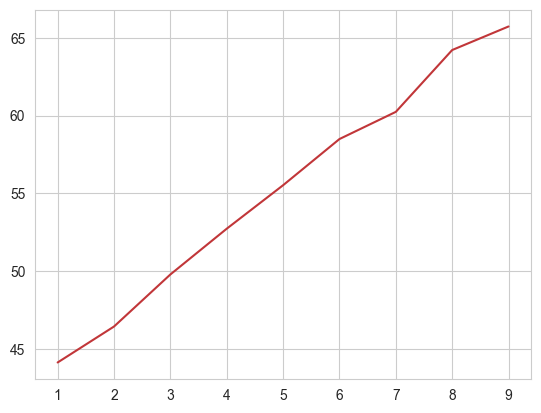

In [29]:
# Hours studied and Performance Index
avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index,
         avg_performance_by_hours.values)
plt.show()

In [30]:
# The more hours one sleeps, the better the performance. This is only contextually true. It is within
# bounds (limitations)

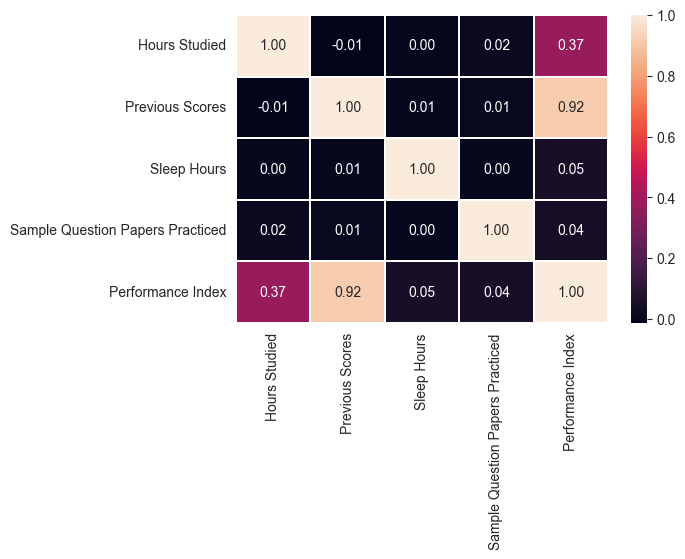

In [32]:
# Heatmap of correlation
plt.figure(figsize=(6, 4))
sns.heatmap(data.select_dtypes(exclude=object).corr(),
            annot=True,
            fmt=".2f",
            linewidth=0.2,
           )
plt.show()

In [33]:
# There is a strong correlation between Previous Scores and Performance Index

In [34]:
# Data preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [35]:
# Object from label Encoder
encoder = LabelEncoder()
data['Extracurricular Activities'] = encoder.fit_transform(
    data['Extracurricular Activities'])

In [38]:
# See sample of data
data.sample(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
7581,9,55,0,7,3,50.0
7071,9,73,0,7,0,72.0


In [39]:
train = data.drop(columns='Performance Index')
target = data['Performance Index']

In [66]:
# Train
# sample return unordered data, while head returns ordered data
train.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4750,4,78,1,9,2
2305,3,78,1,8,4
913,6,87,1,4,2


In [67]:
# target
target.sample(3)

7388    37.0
6733    76.0
7999    64.0
Name: Performance Index, dtype: float64

In [68]:
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    train,
    target,
    test_size=.2,
    random_state=42)

In [70]:
# Shape of splitted data
X_train.shape
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (8000, 5)
y_train:  (8000,)
X_test:  (2000, 5)
y_test:  (2000,)


In [71]:
# Create model
model = LinearRegression()

# Fit model 
model.fit(X_train, y_train)

LinearRegression()

In [72]:
# Evaluate results
model.score(X_train, y_train)

0.9886898790682355

In [73]:
# Perform predictions
predict = np.round(model.predict(X_test),
                   decimals=1)
predict

array([54.7, 22.6, 47.9, ..., 16.8, 63.3, 45.9])

In [74]:
# Real values vs predicted values
pd.DataFrame({'Actual Performance': y_test, 'Predicted Values': predict})

,Actual Performance,Predicted Values
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


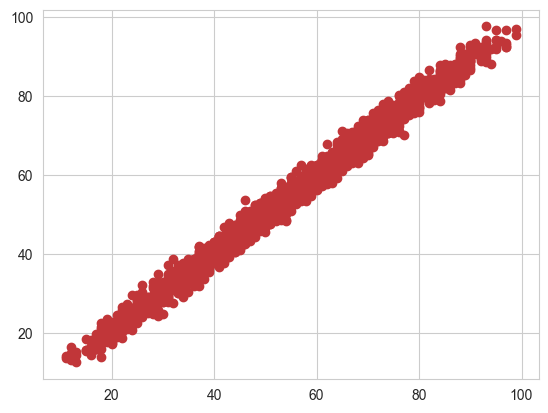

In [75]:
# Create scatter plot to see distribution
plt.scatter(y_test, predict)
plt.show()

In [76]:
# Perform residual analysis to under errors in the model

In [77]:
# mean absolute error
mean_absolute_error(y_test, predict)

np.float64(1.612)

In [78]:
# see score
r2_score(y_test, predict)

0.9889704960519785

In [79]:
# See coefficients
model.coef_

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

In [80]:
# See y intercept
model.intercept_

np.float64(-33.921946215556126)

<h3>Housing Case Study</h3>
<p>
    A real estate company has a dataset containing the prices of properties in Kampala City.
    It wishes to use the data to optimize the sale prices of the properties based on important
    factors such as area, bedroom, parking, etc
</p>

<p>
    Essentially, the company wants-
    *  To identify the variables affecting home prices e.g area, number of rooms, bathrooms, etc
    *  To create a linear model that quantitatively relates house prices with variables
    such as number of rooms, area, number of bathrooms, etc
    *  To know the accuracy of the model i.e how well these variables can predict house prices
</p>

In [46]:
# Suppress warning
import warnings
warnings.filterwarnings('ignore')

# dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [47]:
housing = pd.read_csv('../Data/Housing.csv')
housing.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [48]:
# shape
housing.shape

(545, 13)

In [49]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [50]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


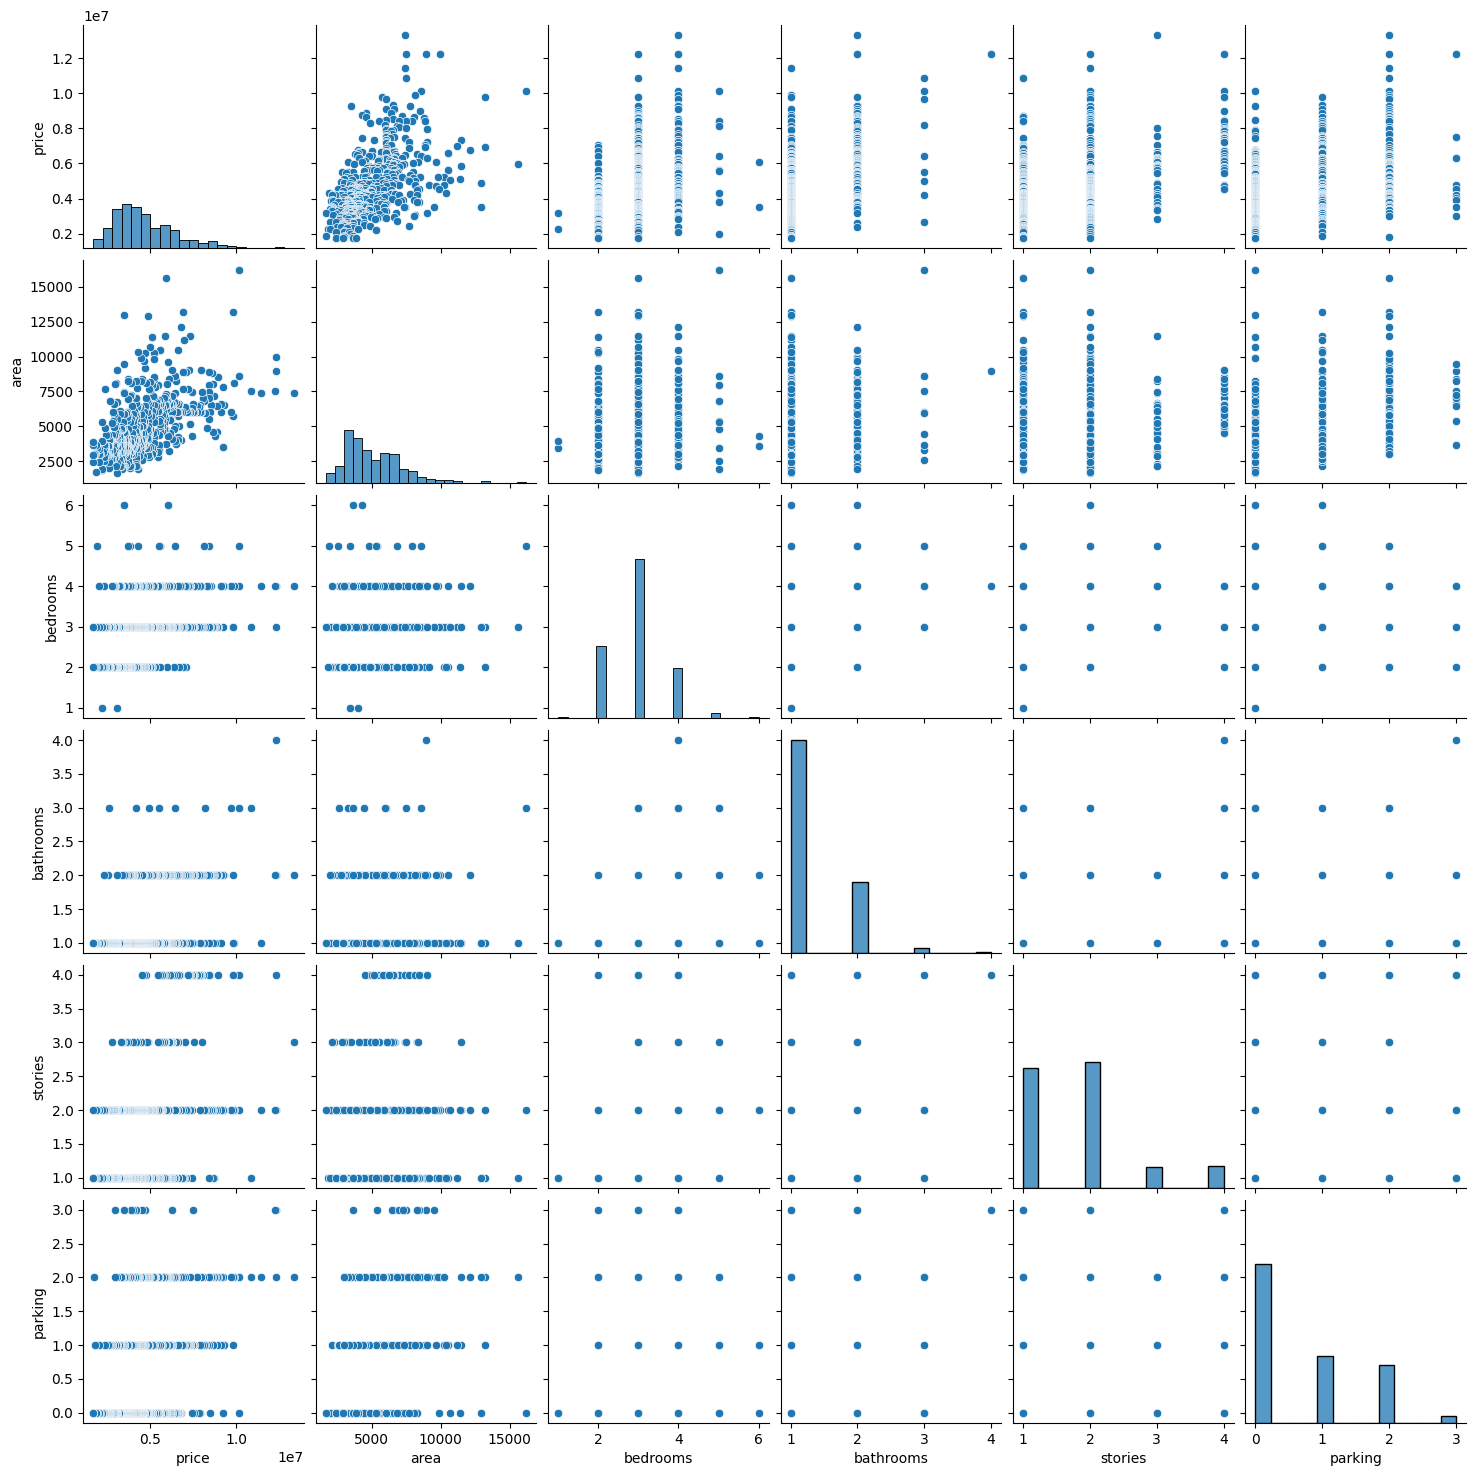

In [51]:
sns.pairplot(housing)
plt.show()

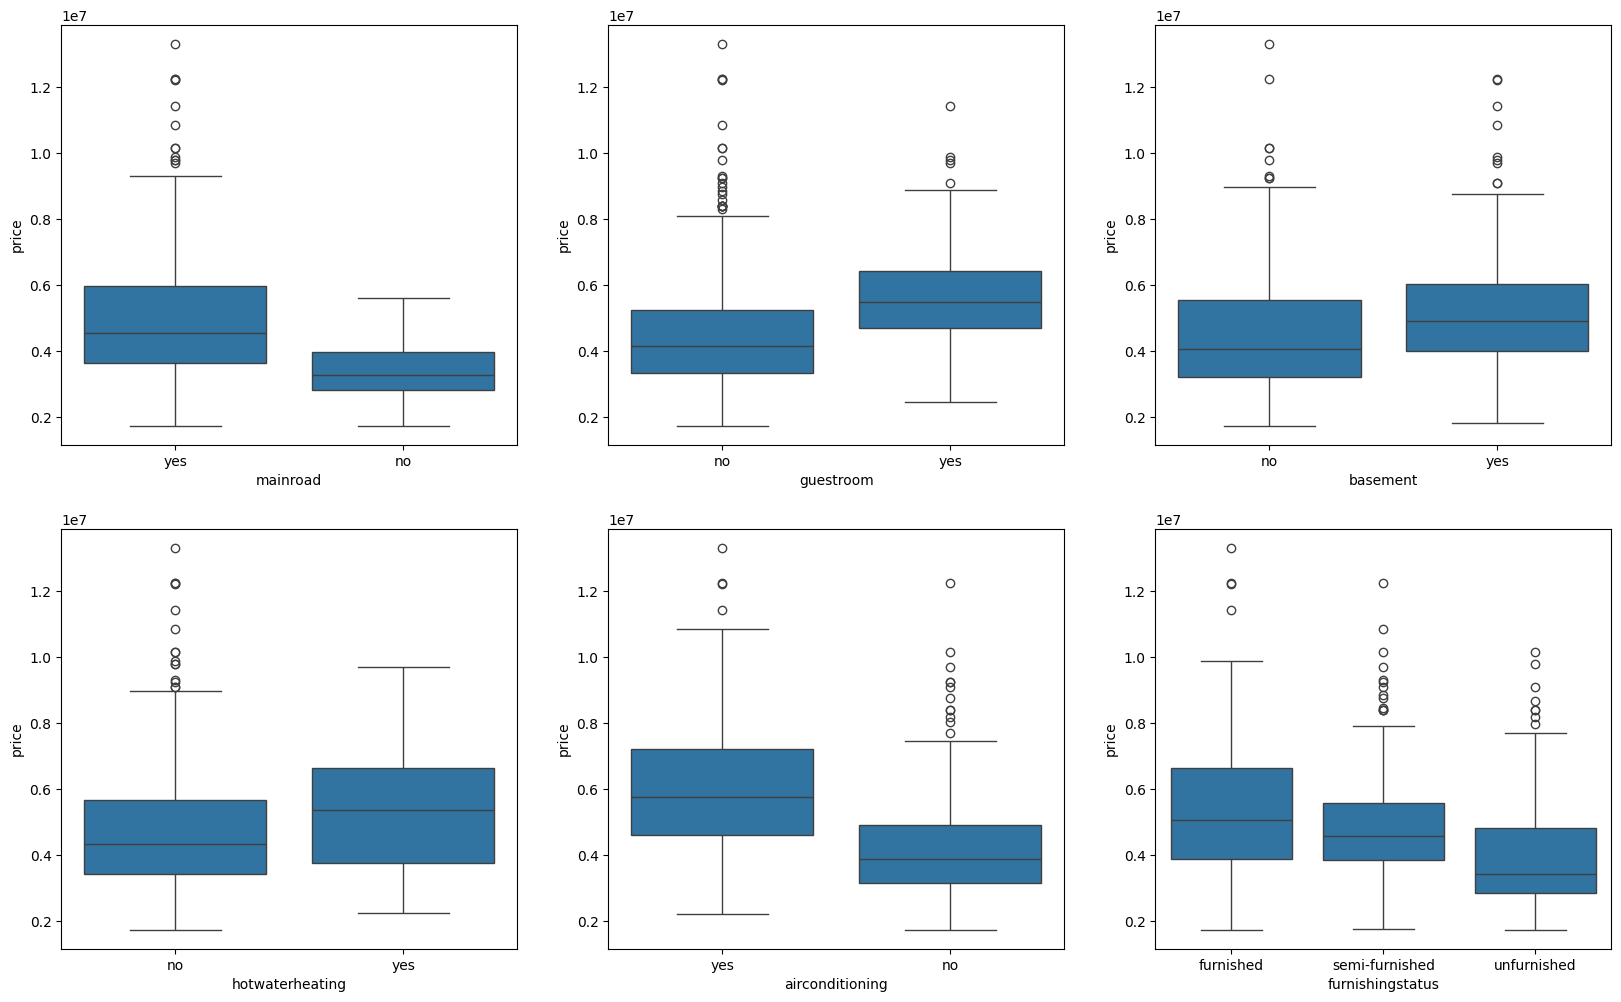

In [52]:
# Boxplots
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x='mainroad',
            y='price',
            data=housing)
plt.subplot(2, 3, 2)
sns.boxplot(x='guestroom',
            y='price',
            data=housing)

plt.subplot(2, 3, 3)
sns.boxplot(x='basement',
            y='price',
            data=housing)

plt.subplot(2, 3, 4)
sns.boxplot(x='hotwaterheating',
            y='price',
            data=housing)

plt.subplot(2, 3, 5)
sns.boxplot(x='airconditioning',
            y='price',
            data=housing)

plt.subplot(2, 3, 6)
sns.boxplot(x='furnishingstatus',
            y='price',
            data=housing);

In [53]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [54]:
varlist = [
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea',
]

In [55]:
# binary mapping
def binary_map(x):
    return x.map(
        {'yes': 1,
         'no': 0
        })

In [56]:
housing[varlist] = housing[varlist].apply(lambda x: binary_map(x))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [57]:
# dummy variables
# the variable furnishingstatus has three levels. We need to convert these levels into integers as well

status = pd.get_dummies(
    housing['furnishingstatus'],
    dtype='int32')

In [58]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [59]:
# We don't need three columns. We drop the furnished columns, as the type of furnishing
# can be identified with just the last two columns where
# 00 will correspond to furnished
# 01 will correspond to unfurnished
# 10 will correspond to semi-furnished

In [60]:
# drop first column
status = pd.get_dummies(
    housing['furnishingstatus'],
    drop_first=True,
    dtype='int32')
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [61]:
# Add results to the original housing dataframe
housing = pd.concat([housing, status], axis=1)

In [62]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [63]:
# Drop 'furnishingstatus'
housing.drop(
    ['furnishingstatus'],
    axis=1,
    inplace=True)

In [64]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [65]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

np.random.seed(0) # to always have the same rows of train and test dataset respectively

df_train, df_test = train_test_split(housing,
                                     train_size=.7,
                                     test_size=.3,
                                     random_state=100)

In [66]:
# Rescaling the features
# Scaling doesn't impact the model. We can see that except for area, all
# the other columns have small integer values. If we don't have comparable scales,
# then some of the coefficients as obtained by fitting the regression model might be
# very large or very small as compared to the other coefficients. This might become very
# annoying at the time of model evaluation. So it is advised to use standardization or
# normalization so as the units of the coefficients obtained are all on the same scale. There
# are two common ways of rescaling;
# 1. Min-Max scaling
# 2. Standardization (mean-0, sigma-1)

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [68]:
# Apply scaler() to all the columns except the 'yes-no' and dummy variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [69]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [70]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [71]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


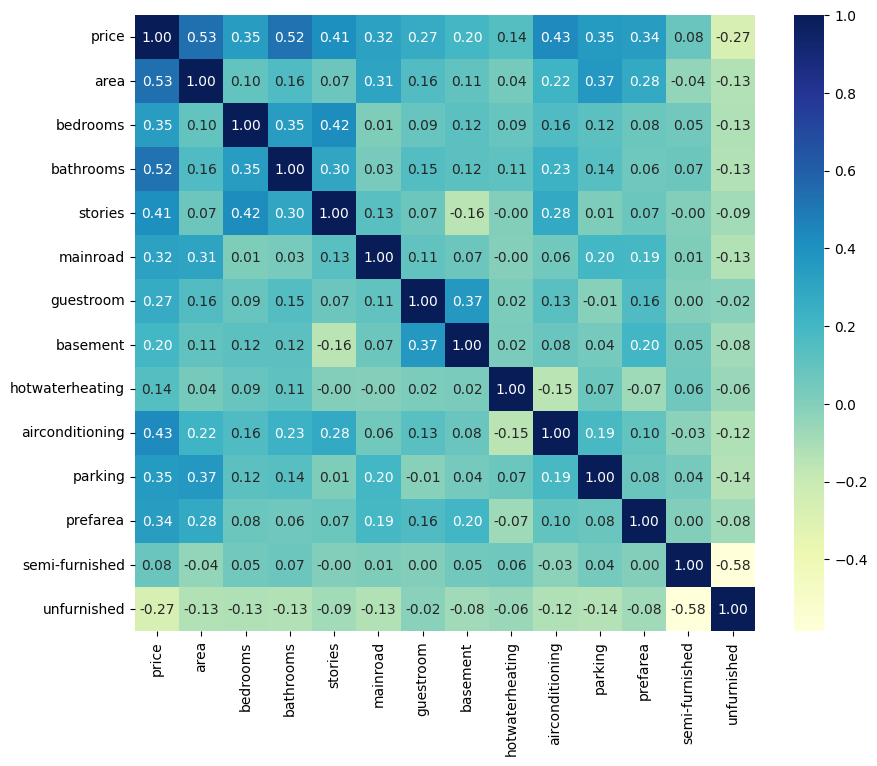

In [72]:
# Correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(),
            annot=True,
            fmt=".2f",
            cmap='YlGnBu');
plt.show()

In [73]:
# Area correlates to price most

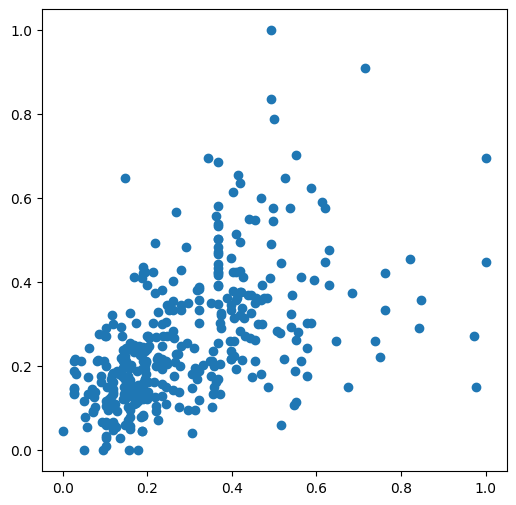

In [74]:
# Pairplot of area vs price
plt.figure(figsize=[6,6])
plt.scatter(df_train.area, df_train.price)
plt.show();

In [75]:
# Picking area as the first dependant varible
y_train = df_train.pop('price')
X_train = df_train

In [76]:
# Building a linear model
import statsmodels.api as sm

# Add constant
X_train_lm = sm.add_constant(X_train[['area']])

In [78]:
# fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# check the parameters obtained
lr.params

const    0.126894
area     0.462192
dtype: float64

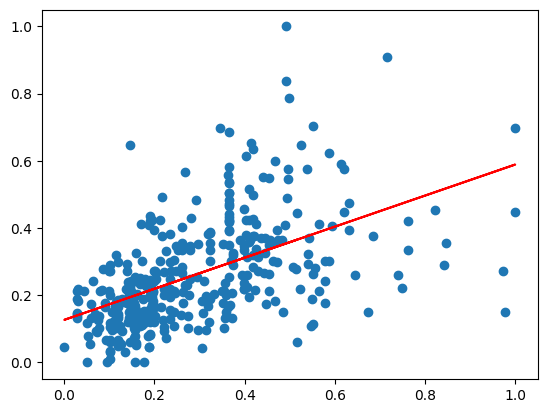

In [79]:
# Visualization
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.126894 + 0.462192*X_train_lm.iloc[:, 1], 'r')

In [80]:
# summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           3.15e-29
Time:                        08:57:49   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

In [ ]:
# R-Squared value is 0.283. This is a very low value.

In [81]:
# Adding another variable
# Assign all the features variable to X
X_train_lm = X_train[['area', 'bathrooms']]

In [82]:
# build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [83]:
# check summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           2.51e-54
Time:                        09:10:53   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

In [84]:
# R-Sqaured value has improved

In [85]:
# Add another variable
X_train_lm = X_train[['area', 'bathrooms', 'bedrooms']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [86]:
# summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           3.12e-57
Time:                        09:18:46   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

In [87]:
# R-Squared value increases

In [89]:
# Adding all the columns
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [90]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           8.83e-83
Time:                        09:48:44   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

In [91]:
# R-squared improved to 0.681

In [ ]:
# It looking at the p-values it looks like some of the variables 